<a href="https://colab.research.google.com/github/kittimaxz/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [77]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [78]:
Name = 'กิตติมา อุปสุข'
ID = '6230210409'

In [79]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [80]:
Data = DataGenerator(Name,ID)

021:22:11


In [81]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-0.889351,-3.687852,5.854784,-3.415873,-5.610665,-2.582173,3.694650,-5.062654,-4.586200,6.457132,2.304650,4.329046,7.206710,-5.144610,-1.245484,-7.250447,9.249019,4.797001,5.020432,-3.889117,8.994408,-11.231579,-7.375703,-54.157893
1,6.888596,-6.324905,-5.740092,5.299575,-2.842515,2.372734,7.933971,-9.659946,6.361068,-10.214856,0.338380,-1.412124,3.624184,4.602672,-8.628475,-7.482172,-0.471848,5.111467,-7.731085,2.441740,-7.366802,-1.858061,-12.649810,-7.290306
2,8.017362,8.473604,3.038962,-6.893468,-7.191756,-2.181812,-8.602517,1.635662,-4.501795,-8.114539,-6.316734,-4.982942,1.302537,-2.022844,0.086704,-2.306383,-8.802485,-6.781084,-3.476832,-4.668904,-9.690799,5.240675,16.947207,28.203376
3,-5.259314,7.534503,7.437431,4.414411,-0.059253,-7.445860,-4.424710,-3.564299,-3.465228,-0.862653,2.011504,-4.724475,6.885026,4.804179,7.909228,-4.198045,4.079989,2.923757,-2.001206,-2.269056,6.894771,1.137825,15.069006,7.689124
4,11.803001,-5.373877,-6.309848,5.999780,-2.165905,3.767224,8.701775,-8.471486,5.789175,-9.041266,0.967662,-0.752092,4.443130,3.572116,-9.602990,-7.327553,2.603626,3.287083,-6.879058,1.562324,-6.132335,-0.672218,-10.747753,-1.361092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.386310,0.143661,7.034918,8.043940,6.736725,6.999241,4.103643,-2.564332,-3.517837,6.354337,-7.514451,-2.221127,-5.829928,2.024862,6.591702,-3.938688,6.786948,5.749472,2.184205,-5.268825,6.337545,-0.350062,0.287322,0.249688
9996,-5.933911,7.865360,7.554697,5.966666,-0.086257,-5.588988,-3.534003,-2.527750,-4.761734,-0.426129,1.003535,-6.136890,5.449768,3.955082,6.685563,-6.451825,3.396171,3.630983,-1.397212,-3.044932,5.194200,1.544812,15.730721,9.724062
9997,-9.191507,-5.048968,4.294216,-9.342154,-7.362920,-9.229852,-4.192468,3.754275,-2.734278,4.230375,-9.031066,7.426534,-6.797743,-5.650139,2.036746,8.826735,5.432167,9.468526,6.800718,-1.900056,-3.067357,3.287883,-10.097935,18.439417
9998,-2.169208,11.419935,-5.335483,3.089792,8.711882,6.311260,-4.494053,11.339766,-1.473491,10.446842,-9.495673,9.596118,5.562927,-7.996054,4.785754,-5.670202,1.141286,0.046121,-7.345678,5.898585,8.302183,2.210728,22.839871,13.053641


เตรียมข้อมูลก่อนที่จะนำไปใช้ โดยการตัดตัวที่มี correlation กันออกไปก่อน เพื่อลดข้อมูลที่เหมือนกันออกจาก  Data

In [82]:
Data.shape ###ดูขนาดของข้อมูล Data

(10000, 24)

In [83]:
corr=np.corrcoef(Data.to_numpy().T) ###คำสั่งในการสร้างเมทริกซ์สหสัมพันธ์

In [84]:
corr.shape ###ดูขนาดของ corrcoef ของ Data

(24, 24)

In [164]:
corr ###ค่าสหสัมพันธ์ที่ได้

array([[ 1.00000000e+00,  9.94463891e-02, -9.57660187e-02,
         2.82533013e-01,  1.64011618e-01,  6.01548628e-01,
         5.04452766e-02, -1.42144593e-01,  4.72085479e-01,
        -2.58969172e-01,  1.00345079e-01, -2.88065501e-01,
        -2.14663110e-02,  4.85179880e-01,  4.90147099e-02,
        -4.32820010e-01, -2.85484783e-01, -2.38789975e-01,
        -2.00455765e-01, -2.29952379e-01, -3.38677182e-01,
        -2.25754866e-01,  9.94463891e-02, -2.25754866e-01],
       [ 9.94463891e-02,  1.00000000e+00,  6.05310418e-02,
         1.66262231e-01,  5.59336761e-01,  2.27874430e-02,
        -6.61631955e-01,  5.76150086e-01, -9.60664944e-02,
         7.88940961e-02, -3.15495479e-01, -2.87149415e-01,
         1.35210471e-01,  3.21660267e-02,  2.59174583e-01,
        -3.16824945e-01, -5.19267930e-01, -2.00713616e-01,
        -2.71882791e-01,  2.27367673e-01, -9.24603774e-02,
         2.44604954e-01,  1.00000000e+00,  2.44604954e-01],
       [-9.57660187e-02,  6.05310418e-02,  1.00000000e

ทำการวนลูปหาค่า correlation ที่ซ้ำกัน เพื่อนำค่าที่ซ้ำกันออก

In [165]:
###คำสั่งในการวนลูปเพื่อที่จะหาค่าว่าซ้ำกันหรือไม่ โดยหากมีการแสดงผลข้อมูลนั้นหมายความว่ามีค่าที่ซ้ำกัน
for i in range(corr.shape[0]): 
  for j in range(corr.shape[1]):
    if (i != j) and (corr[i,j] == 1.):
      print (f' row={i} column={j} corrcoef={corr[i,j]}')

 row=1 column=22 corrcoef=1.0
 row=21 column=23 corrcoef=1.0
 row=22 column=1 corrcoef=1.0
 row=23 column=21 corrcoef=1.0


จากการวนลูป จะเห็นได้ว่ามี correlation ที่ซ้ำกันอยู่ ดังนั้นจึงต้องทำการนำข้อมูลที่ซ้ำกันออกก่อน จึงจะนำข้อมูลไปใช้ได้

In [159]:
new_Data=Data.iloc[:,1:21]
new_Data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-3.687852,5.854784,-3.415873,-5.610665,-2.582173,3.694650,-5.062654,-4.586200,6.457132,2.304650,4.329046,7.206710,-5.144610,-1.245484,-7.250447,9.249019,4.797001,5.020432,-3.889117,8.994408
1,-6.324905,-5.740092,5.299575,-2.842515,2.372734,7.933971,-9.659946,6.361068,-10.214856,0.338380,-1.412124,3.624184,4.602672,-8.628475,-7.482172,-0.471848,5.111467,-7.731085,2.441740,-7.366802
2,8.473604,3.038962,-6.893468,-7.191756,-2.181812,-8.602517,1.635662,-4.501795,-8.114539,-6.316734,-4.982942,1.302537,-2.022844,0.086704,-2.306383,-8.802485,-6.781084,-3.476832,-4.668904,-9.690799
3,7.534503,7.437431,4.414411,-0.059253,-7.445860,-4.424710,-3.564299,-3.465228,-0.862653,2.011504,-4.724475,6.885026,4.804179,7.909228,-4.198045,4.079989,2.923757,-2.001206,-2.269056,6.894771
4,-5.373877,-6.309848,5.999780,-2.165905,3.767224,8.701775,-8.471486,5.789175,-9.041266,0.967662,-0.752092,4.443130,3.572116,-9.602990,-7.327553,2.603626,3.287083,-6.879058,1.562324,-6.132335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.143661,7.034918,8.043940,6.736725,6.999241,4.103643,-2.564332,-3.517837,6.354337,-7.514451,-2.221127,-5.829928,2.024862,6.591702,-3.938688,6.786948,5.749472,2.184205,-5.268825,6.337545
9996,7.865360,7.554697,5.966666,-0.086257,-5.588988,-3.534003,-2.527750,-4.761734,-0.426129,1.003535,-6.136890,5.449768,3.955082,6.685563,-6.451825,3.396171,3.630983,-1.397212,-3.044932,5.194200
9997,-5.048968,4.294216,-9.342154,-7.362920,-9.229852,-4.192468,3.754275,-2.734278,4.230375,-9.031066,7.426534,-6.797743,-5.650139,2.036746,8.826735,5.432167,9.468526,6.800718,-1.900056,-3.067357
9998,11.419935,-5.335483,3.089792,8.711882,6.311260,-4.494053,11.339766,-1.473491,10.446842,-9.495673,9.596118,5.562927,-7.996054,4.785754,-5.670202,1.141286,0.046121,-7.345678,5.898585,8.302183


In [166]:
new_Data.shape ###ดูขนาดของข้อมูลเมื่อทำการลบข้อมูลที่ซ้ำกันออก

(10000, 20)

**2.ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

**Clustering**

**K-mean**

***import***

In [160]:
from sklearn.cluster import KMeans 
###ทำการ import function ที่จะใช้ในการหาค่า KMean จาก sklearn.cluster

***define***

In [161]:
kmeans=KMeans(n_clusters=3,random_state=2021)
###ทำการหาค่า KMeans โดยกำหนดค่า k ที่เราต้องการ ซึ่งในการกำหนดค่า k นั้นไม่จำเป็นต้องกำหนดก็ได้ เนื่องจาก kmean มี defult
###การกำหนด random_state นั้น เพื่อที่จะให้มีการสุ่มที่จุดเดียวกัน เพื่อที่จะได้จัดกลุ่มได้เหมือนกัน

***fit-transform***

คำนวณหาจุด cluster center ของข้อมูล data ด้วยวิธี K-Means Clustering

In [162]:
kmeans.fit(new_Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

แสดง จุด cluster centers ที่คำนวณออกมาได้

In [122]:
kmeans.cluster_centers_ ###คำนวณจุด cluster centers ของข้อมูลด้วย kmeans

array([[ 5.65713405,  3.739273  ,  4.30821546,  5.98370326,  2.45936113,
        -3.47000493,  1.91810425, -1.96343012,  3.56352523, -3.77023406,
        -0.42914311,  0.36275591,  0.67433711,  5.59165873, -5.07476993,
         3.46675247,  3.76021417, -0.51245901, -1.54709323,  4.57072864],
       [ 1.40232885,  0.40716504,  1.24858897, -4.76622029, -3.1369662 ,
         3.6933686 , -3.47684324, -2.37597369, -8.85350989, -1.06928349,
        -1.53870261,  4.80239039, -3.26574261, -2.8489967 , -6.63787363,
        -0.63362296, -0.57058582, -0.81769341,  0.69349326, -5.1213054 ],
       [-4.31226236,  2.67285477, -5.81011718, -6.73239419, -2.36574901,
         1.39685689, -3.63682726, -4.57056893,  1.54308147, -0.68522088,
         4.1347201 , -0.0231572 , -5.24301838,  0.90123958,  2.52099702,
         8.07533313,  2.09466124,  2.87658528, -5.77745009,  4.83474296]])

ทำสอบการจัดกลุ่มของ Data

In [123]:
y=kmeans.predict(new_Data) ###ทำการกำหนดข้อมูลที่จัดกลุ่มเป็น y
y

array([2, 1, 1, ..., 2, 0, 0], dtype=int32)

**Visualize**

ทำ PCA ข้อมูล Data เพื่อลด Dimension

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca=PCA(n_components=2) ###กำหนด Dimension=2

In [127]:
new_pca=pca.fit_transform(new_Data)

In [128]:
import matplotlib ###ทำการ import matplotlib เพื่อใช้ในการสร้างกราฟ

In [129]:
matplotlib.rcParams['figure.figsize']=[10,15]
###ทำการเพิ่มขนาดของกราฟ เพื่อให้สามารถดูการกระจายของข้อมูลได้ง่ายขึ้นในการดูข้อมูลที่ซ้อนทับกันมากๆ 

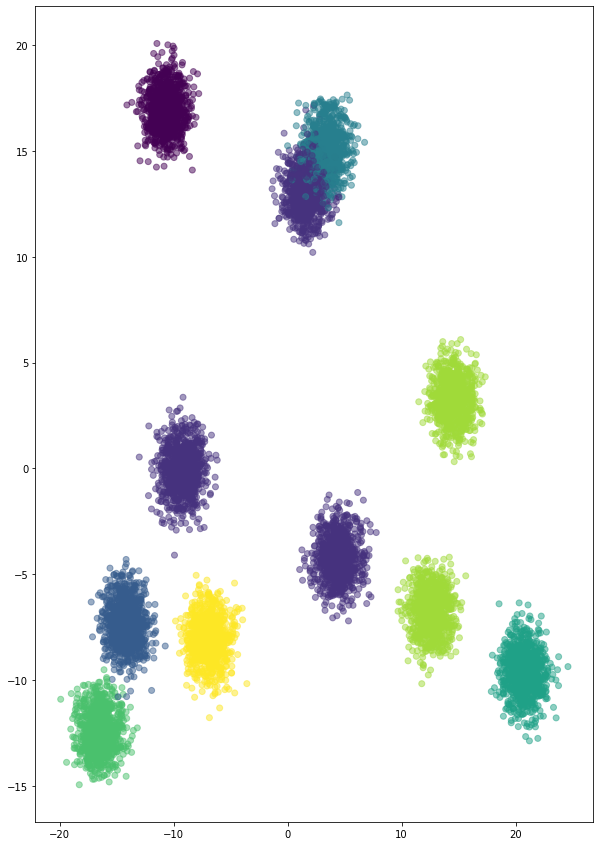

In [183]:
kmeans=KMeans(random_state=2021)
kmeans.fit(new_Data)
y=kmeans.predict(new_Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)

จากกราฟข้างต้นจะเห็นได้ว่าหากไม่มีการกำหนดกลุ่มของข้อมูลนั้น เมื่อวิเคราะห์จากสีของกลุ่มของข้อมูลนั้นพบว่ามี 9 กลุ่มข้อมูลจากสีที่แตกต่างกัน ดังนั้นจึงต้องมีการกำหนดกลุ่มของข้อมูล เพื่อให้ได้กลุ่มที่เหมาะสมกับข้อมูล

**Elbow Method**

ทำการหาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่มข้อมูล หาค่า k จากการทำในวิธี elbow method

**SSE**

SSE คือ sum of squared error เป็นการคำนวณหาค่าความคลาดเคลื่อน

In [168]:
kmeans.inertia_ ###คำสั่งในการคำนวณค่า SSE ของ data

1131380.9066752752

In [169]:
SSE=list()
for k in [1,2,3,4,5,6,7,8]:
  kmeans=KMeans(n_clusters=k,random_state=2021)
  kmeans.fit(new_Data)
  SSE.append(kmeans.inertia_)

In [170]:
SSE

[6106296.970017579,
 4890377.266045978,
 3970349.8691784246,
 3309460.0259527653,
 2652501.6276094685,
 2086620.7264184852,
 1546795.934523948,
 1131380.9066752752]

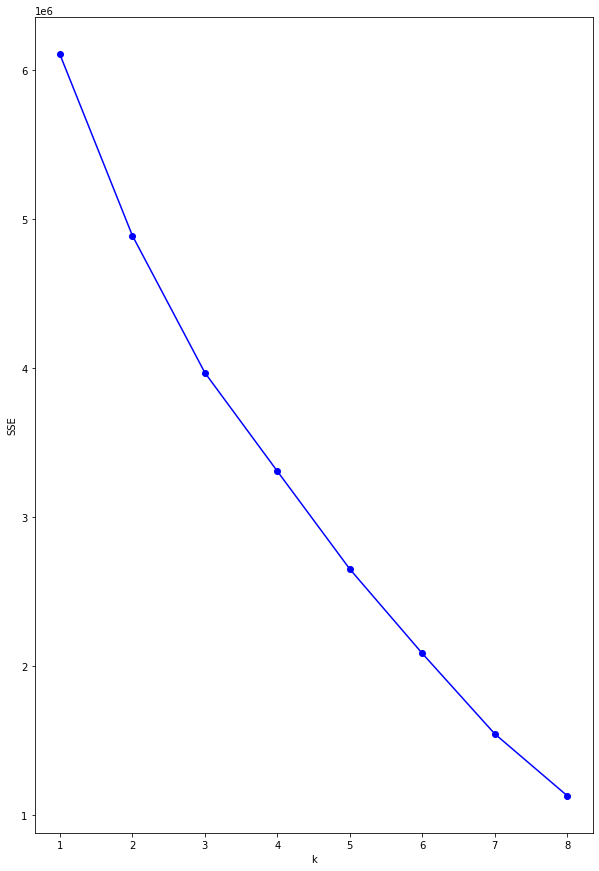

In [171]:
###ทำการนำค่า SSE ที่ได้มาทำการ plot กราฟเพื่อดูว่ามีค่า k กี่กลุ่ม
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟข้างต้นจะเห็นได้ว่า k มีทั้งหมด 3 กลุ่ม ซึ่งดูจากจุดที่ 1 และ 2 ที่มีระยะห่างระหว่างกันอย่างเห้นได้ชัด และที่จุด 3และ 4 ที่มีระยะห่างใกล้เคียงกันแต่ก็มีระยะห่างออกจากจุด 5,6,7 ที่มีระยะใกล้เคียงกัน

Text(0, 0.5, 'Y')

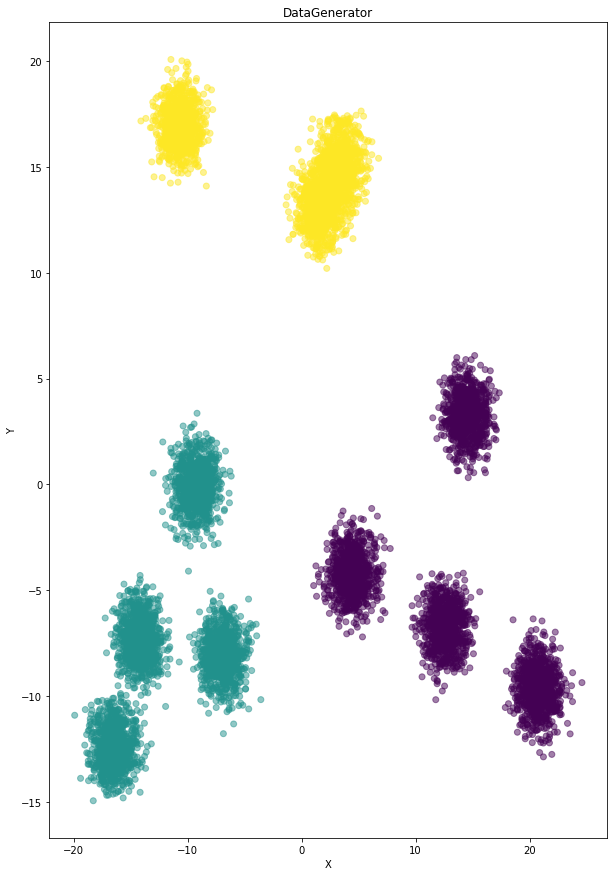

In [182]:
kmeans=KMeans(n_clusters=3,random_state=2021)
kmeans.fit(new_Data)
y=kmeans.predict(new_Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

จากกราฟข้างต้นจะเห็นได้ว่า เมื่อจัดกลุ่ม k ให้เท่ากับ 3 กลุ่ม ซึ่งจะมีข้อมูลอยู่ในกลุ่มเดียวกันจะอยู่ใกล้เคียงกัน และแต่ละกลุ่มแต่ละกลุ่มอยู่ระหว่างกันนั้นข้อมูลนั้นไม่ซ้อนทับกันอย่างเห็นได้ชัดเจน

**Silhouette coeffient**

การหาค่า k จากวิธี Silhouette coeffient (ค่าสัมประสิทธ์ภาพเงา)

จุดของข้อมูลนั้นอยู่ใกล้กับจุดอื่นๆ ใน cluster มากน้อยเพียงใด

จุดของข้อมูลอยู่ห่างจากจุดใน cluster อื่นมากเพียงใด

In [139]:
from sklearn import metrics

In [140]:
SilH=list()
for k in [2,3,4,5,6,7,8]:
  kmeans=KMeans(n_clusters=k,random_state=2021)
  kmeans.fit(new_Data)
  score=metrics.silhouette_score(Data,kmeans.labels_)
  SilH.append(score)

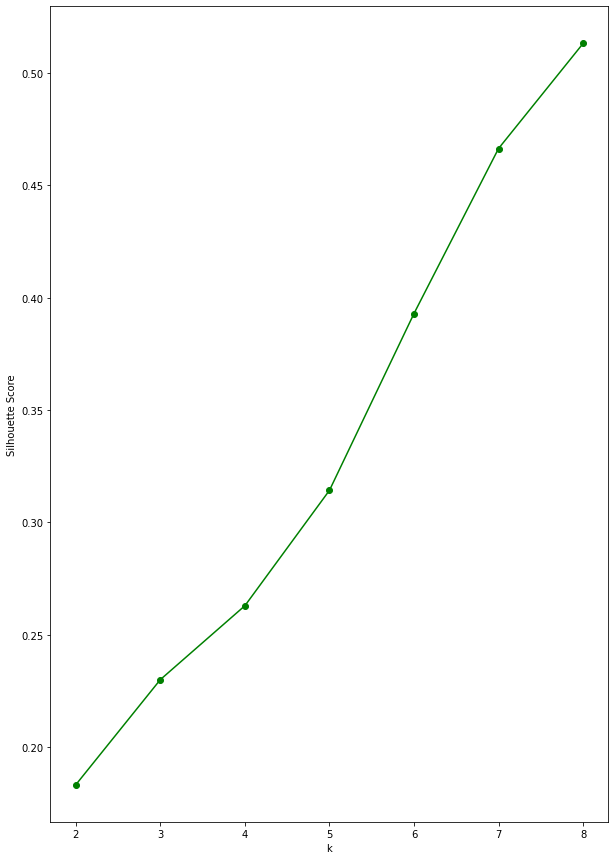

In [141]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

จากกราฟข้างต้นจะเห็นได้ว่า k มีทั้งหมด 3 กลุ่ม ซึ่งดูจากจุดที่มีระยะห่างแตกต่างกันใน 3 ช่วง โดยช่วงที่ k เท่ากับ 3,5,7

In [108]:
matplotlib.rcParams['figure.figsize']=[10,15]

Text(0, 0.5, 'Y')

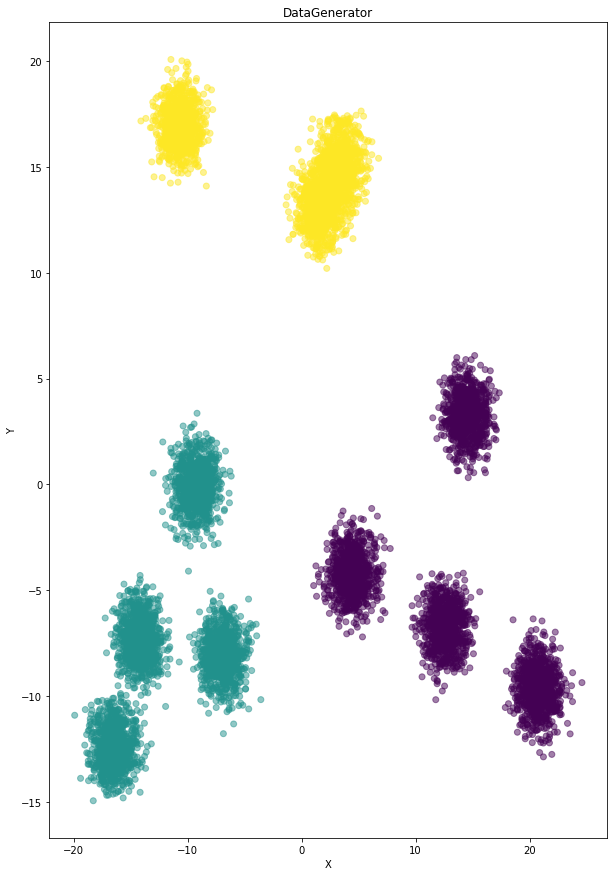

In [181]:
kmeans=KMeans(n_clusters=3,random_state=2021)
kmeans.fit(new_Data)
y=kmeans.predict(new_Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

จากกราฟข้างต้นจะเห็นได้ว่า เมื่อจัดกลุ่ม k ให้เท่ากับ 3 กลุ่ม ซึ่งจะมีข้อมูลอยู่ในกลุ่มเดียวกันจะอยู่ใกล้เคียงกัน และแต่ละกลุ่มแต่ละกลุ่มอยู่ระหว่างกันนั้นข้อมูลนั้นไม่ซ้อนทับกันอย่างเห็นได้ชัดเจน

**3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

ในการทำการลด Dimension นั้นมีอยู่ทั้งหมด 3 วิธี คือ 1.PCA 2.MDS 3.Factor Analysis โดยในที่นี้จะใช้การทำ MDS ในการลด Dimension ของข้อมูล

In [172]:
from sklearn.manifold import MDS ###คำสั่ง import function ในการทำ MDS

In [173]:
mds=MDS(n_components=2) ###กำหนดให้ Dimension=2

In [174]:
new_mds=mds.fit_transform(new_Data) ###คำนวณหาระยะห่างระหว่างจุด

**K-Mean**

In [175]:
kmeans1=KMeans(n_clusters=3,random_state=2021) ###กำหนดกลุ่ม k=3 ซึ่งได้จาก k ที่เหมาะสมที่ได้จากข้างต้น
kmeans1.fit_transform(new_Data)
z=kmeans1.predict(new_Data) ###กำหนดการจัดกลุ่มข้อมูลอยู่ใน z

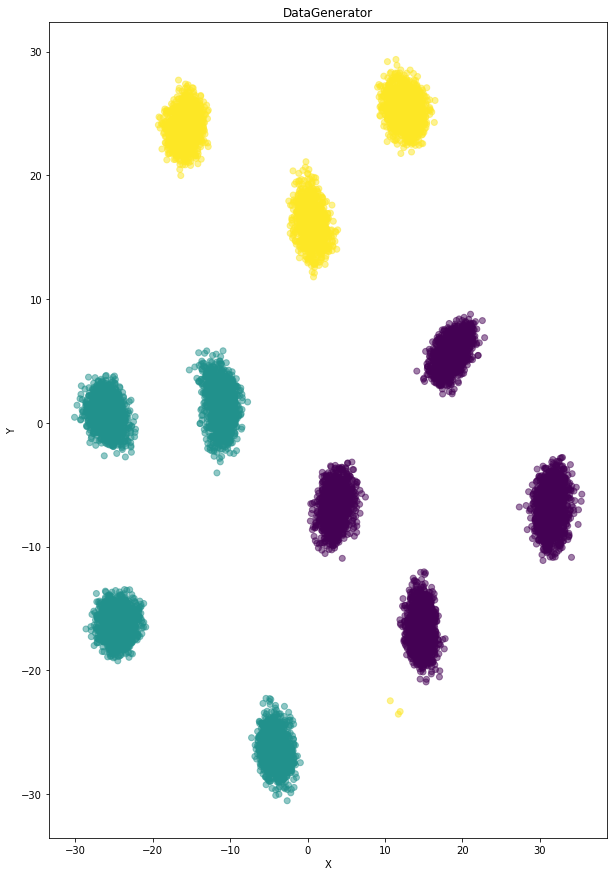

In [180]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=z,alpha=0.5)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y');

จากกราฟข้างต้นจะเห็นได้ว่า เมื่อจัดกลุ่ม k ให้เท่ากับ 3 กลุ่ม ซึ่งจะมีข้อมูลอยู่ในกลุ่มเดียวกันจะอยู่ใกล้เคียงกัน และแต่ละกลุ่มแต่ละกลุ่มอยู่ระหว่างกันนั้นข้อมูลนั้นไม่ซ้อนทับกันอย่างเห็นได้ชัดเจน

**4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.**

กราฟที่ได้จากข้อ 2

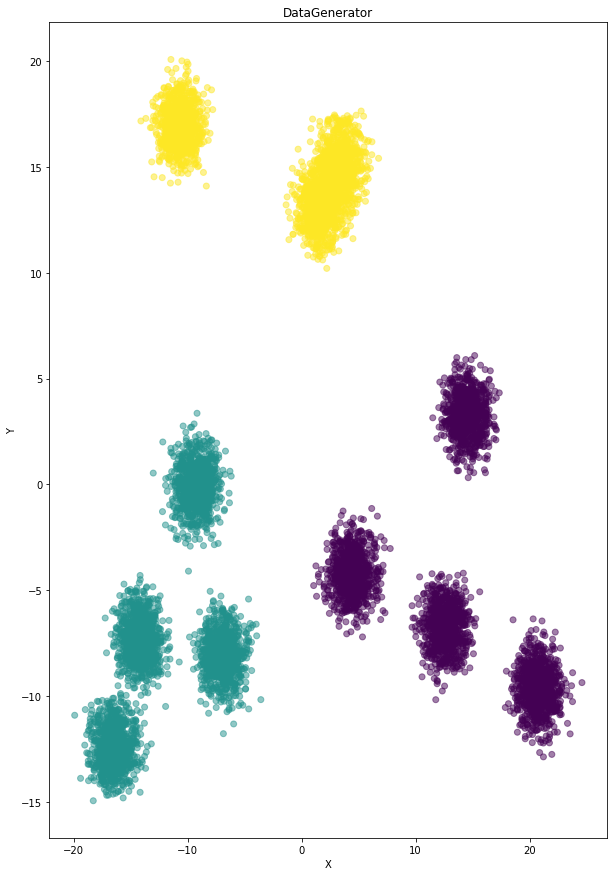

In [179]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y');

กราฟที่ได้จากข้อ 3

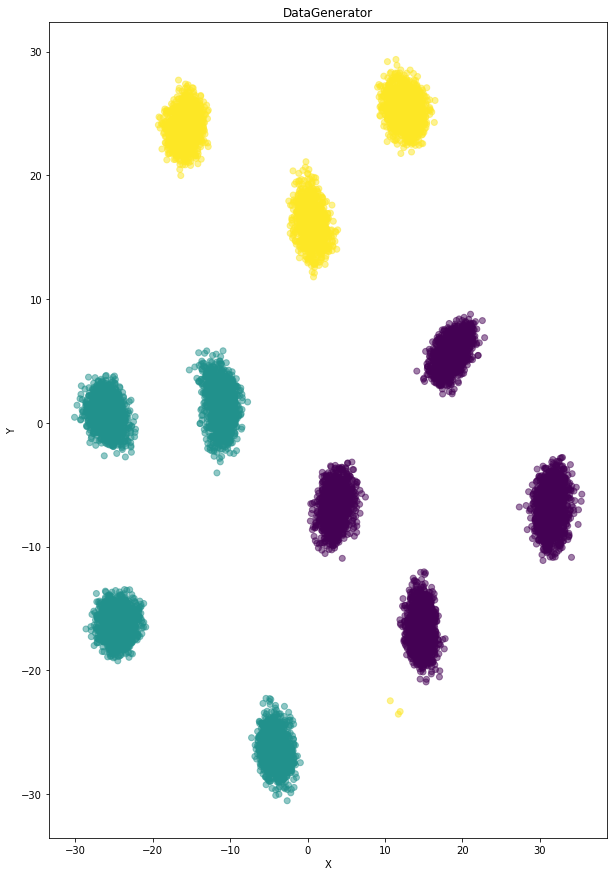

In [178]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=z,alpha=0.5)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y');

จากการเปรียบเทียบกราฟที่ได้จากทั้งข้อ 2 และข้อ 3 นั้นพบว่ากราฟมีการกระจายของข้อมูลที่ต่างกัน โดยที่กลุ่มของข้อมูลในแต่ละกลุ่มนั้นมีจำนวนใกล้เคียงกัน แต่แตกต่างกันที่จุดตั้งต้นของข้อมูลในกลุ่มนั้นๆ